# PFDA Project

### by E. Qejvani
***

## Part 1 - Preparing the dataset.
***

* Uploading the libraries.
* Keeping the information we are interested in.
* Preparing the dataset for analyzing.
    - Checking data types of the coulumns.
    - Checking for empty value cells or NaN value cells.
    - Cleaning the dataset.

In [1]:
# Importing the libraries.
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
# Importing project_functions file where I'm storing all the functions to use in this project. 
from project_functions import *         

In [2]:
# Uploading the dataset to my data frame, skipping the first 23 rows as the dataset starts at row 24. 
# Setting low_memory=False - easier to upload in big datasets.
df = pd.read_csv('./data/data_valentia.csv', skiprows=23, low_memory=False)

# Creating a subset using only the data I need for this project.
# Two ways of doing it:
df_valentia = df[['date', 'rain', 'temp', 'wetb', 'dewpt', 'rhum', 'vappr', 'msl', 'wdsp', 'wddir']].copy()
# or:
# df_valentia = df.drop(columns=['ww', 'sun', 'w', 'vis', 'clht', 'clamt', 'ind', 'ind.1', 'ind.2', 'ind.3', 'ind.4']) 

df_valentia.head(5)

,date,rain,temp,wetb,dewpt,rhum,vappr,msl,wdsp,wddir
0,01-jan-1944 00:00,0.0,9.3,8.3,7.2,86,10.1,1034.3,12,300
1,01-jan-1944 01:00,0.0,8.9,8.2,7.2,90,10.3,1033.9,9,290
2,01-jan-1944 02:00,0.0,9.4,8.1,6.6,83,9.7,1033.4,11,280
3,01-jan-1944 03:00,0.0,9.3,8.3,7.2,86,10.2,1032.8,11,280
4,01-jan-1944 04:00,0.5,8.6,7.8,7.2,89,9.9,1032.4,11,300


### Checking the dataset.

In [3]:
# Information about our dataset.
df_valentia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709320 entries, 0 to 709319
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    709320 non-null  object
 1   rain    709320 non-null  object
 2   temp    709320 non-null  object
 3   wetb    709320 non-null  object
 4   dewpt   709320 non-null  object
 5   rhum    709320 non-null  object
 6   vappr   709320 non-null  object
 7   msl     709320 non-null  object
 8   wdsp    709320 non-null  object
 9   wddir   709320 non-null  object
dtypes: object(10)
memory usage: 54.1+ MB


### Changing the data types in my dataset.

As we can see from the above all data types in the dataset are object type. To change this I am going to:
- Change the date column type to date type data.
- Change the rest of the columns to float type data.
- For both changes I'm creating a function in the `project_functions.py` file.

In [4]:
# 
columns_to_convert = ['rain', 'temp', 'wetb', 'dewpt', 'rhum', 'vappr', 'msl', 'wdsp', 'wddir']
df_valentia = convert_columns_to_float(df_valentia, columns_to_convert)
df_valentia['date'] = pd.to_datetime(df_valentia['date'], format="%d-%b-%Y %H:%M", errors='coerce')
# Setting the date as index
df_valentia.set_index('date', inplace=True)

In [5]:
df_valentia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 709320 entries, 1944-01-01 00:00:00 to 2024-12-01 00:00:00
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   rain    709278 non-null  float32
 1   temp    709260 non-null  float32
 2   wetb    709260 non-null  float32
 3   dewpt   709260 non-null  float32
 4   rhum    709260 non-null  float32
 5   vappr   709260 non-null  float32
 6   msl     709260 non-null  float32
 7   wdsp    709275 non-null  float32
 8   wddir   709211 non-null  float32
dtypes: float32(9)
memory usage: 29.8 MB


In [6]:
df_valentia.head(3)

,rain,temp,wetb,dewpt,rhum,vappr,msl,wdsp,wddir
date,,,,,,,,,
1944-01-01 00:00:00,0.0,9.3,8.3,7.2,86.0,10.1,1034.300049,12.0,300.0
1944-01-01 01:00:00,0.0,8.9,8.2,7.2,90.0,10.3,1033.900024,9.0,290.0
1944-01-01 02:00:00,0.0,9.4,8.1,6.6,83.0,9.7,1033.400024,11.0,280.0


### Checking if any data is missing - NAN or null values.

In [7]:
# Checking for missing data.
# df_valentia.isnull().sum()
# df_valentia.isna().sum()
# (df_valentia == ' ').sum()

### Checking for single space values `' '`

In Assignment Six of this module, I found out that using `.isna()` and `.isnull()` alone is insufficient for cleaning the dataset. Sometimes, cells can contain an empty value represented by a single space (stored as a string). Therefore, in the next section, I will check for any cells that contain a single space as their value.

### Counting the rows that hold empty cells.

* I created a function in the `project_functions` file that counts all the rows that hold empty cells. 

In [8]:
# calling the funtion from the 'project_functions.py' file.
count_rows_with_empty_or_space_cells_detail(df_valentia)

Rows with 0 empty cells: 709144
Rows with 1 empty cells: 75
Rows with 2 empty cells: 41
Rows with 6 empty cells: 22
Rows with 7 empty cells: 37
Rows with 8 empty cells: 1
Total rows with at least one empty values: 176


176

### Cleaning the rows with empty cells.

* Because of the big size of the dataset (709320 records) I decided to remove all the rows that contain empty cells.
* The total records after removing 176 rows becomes 709144.

In [9]:
df_valentia_clean = remove_rows_with_missing_data(df_valentia)
df_valentia_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 709144 entries, 1944-01-01 00:00:00 to 2024-12-01 00:00:00
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   rain    709144 non-null  float32
 1   temp    709144 non-null  float32
 2   wetb    709144 non-null  float32
 3   dewpt   709144 non-null  float32
 4   rhum    709144 non-null  float32
 5   vappr   709144 non-null  float32
 6   msl     709144 non-null  float32
 7   wdsp    709144 non-null  float32
 8   wddir   709144 non-null  float32
dtypes: float32(9)
memory usage: 29.8 MB


### Converting wind speed to miles per hour.

To convert the wind speed (wdsp) from knots to miles per hour, I will use the conversion factor of 1 knot = 1.15078 miles per hour. In the dataset, wind speed is currently measured in knots, representing the speed of the wind in nautical miles per hour. For my analysis, I need the wind speed expressed in miles per hour. To achieve this, I will create a new column in the df_valentia dataset to store the wind speed values converted to miles per hour.

In [10]:
# Create a new column with the windspeed in metre/second
df_valentia['wdsp_m/s'] = (df_valentia['wdsp'] * 0.51444).round(2)

In [11]:
df_valentia.head()

,rain,temp,wetb,dewpt,rhum,vappr,msl,wdsp,wddir,wdsp_m/s
date,,,,,,,,,,
1944-01-01 00:00:00,0.0,9.3,8.3,7.2,86.0,10.1,1034.300049,12.0,300.0,6.17
1944-01-01 01:00:00,0.0,8.9,8.2,7.2,90.0,10.3,1033.900024,9.0,290.0,4.63
1944-01-01 02:00:00,0.0,9.4,8.1,6.6,83.0,9.7,1033.400024,11.0,280.0,5.66
1944-01-01 03:00:00,0.0,9.3,8.3,7.2,86.0,10.2,1032.800049,11.0,280.0,5.66
1944-01-01 04:00:00,0.5,8.6,7.8,7.2,89.0,9.9,1032.400024,11.0,300.0,5.66


In [12]:
df_valentia = df_valentia.drop(columns=['wdsp'])
df_valentia.head()

,rain,temp,wetb,dewpt,rhum,vappr,msl,wddir,wdsp_m/s
date,,,,,,,,,
1944-01-01 00:00:00,0.0,9.3,8.3,7.2,86.0,10.1,1034.300049,300.0,6.17
1944-01-01 01:00:00,0.0,8.9,8.2,7.2,90.0,10.3,1033.900024,290.0,4.63
1944-01-01 02:00:00,0.0,9.4,8.1,6.6,83.0,9.7,1033.400024,280.0,5.66
1944-01-01 03:00:00,0.0,9.3,8.3,7.2,86.0,10.2,1032.800049,280.0,5.66
1944-01-01 04:00:00,0.5,8.6,7.8,7.2,89.0,9.9,1032.400024,300.0,5.66


In [13]:
df_valentia.info()
df_valentia.columns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 709320 entries, 1944-01-01 00:00:00 to 2024-12-01 00:00:00
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   rain      709278 non-null  float32
 1   temp      709260 non-null  float32
 2   wetb      709260 non-null  float32
 3   dewpt     709260 non-null  float32
 4   rhum      709260 non-null  float32
 5   vappr     709260 non-null  float32
 6   msl       709260 non-null  float32
 7   wddir     709211 non-null  float32
 8   wdsp_m/s  709275 non-null  float32
dtypes: float32(9)
memory usage: 29.8 MB


Index(['rain', 'temp', 'wetb', 'dewpt', 'rhum', 'vappr', 'msl', 'wddir',
       'wdsp_m/s'],
      dtype='object')

### Correlation between wind and other data

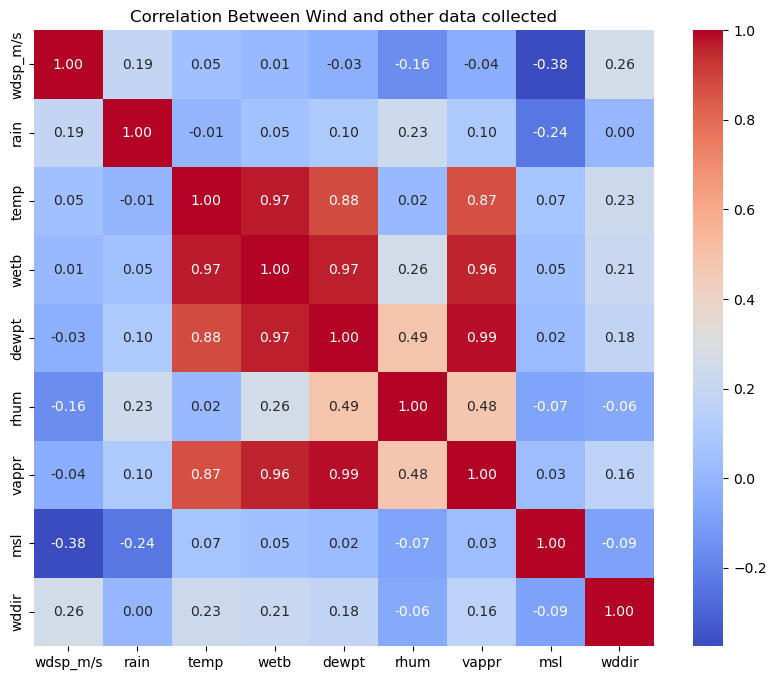

In [14]:
# Selecting columns to for correlation analysis between wind and other information we have.
selected_columns = ['wdsp_m/s','rain', 'temp', 'wetb', 'dewpt', 'rhum', 'vappr', 'msl', 'wddir']
correlation_df = df_valentia[selected_columns]

# Calculating the correlation matrix
correlation_matrix = correlation_df.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Between Wind and other data collected')
plt.show()

As we can see from the above there is no direct connection between the wind speed and the other data we have.
In the next section I will calculate the air density, add it as a new column and remove temp(temperature), vappr(vapor pressure) and msl(mean sea level pressure) columns as they are no longer needed.

In [15]:
# Making changes to the dataset by adding a new column
df_valentia = add_air_density_column(df_valentia)
# Checking if it works
df_valentia.head(5)

,rain,wetb,dewpt,rhum,wddir,wdsp_m/s,air_density
date,,,,,,,
1944-01-01 00:00:00,0.0,8.3,7.2,86.0,300.0,6.17,1.270988
1944-01-01 01:00:00,0.0,8.2,7.2,90.0,290.0,4.63,1.272203
1944-01-01 02:00:00,0.0,8.1,6.6,83.0,280.0,5.66,1.269615
1944-01-01 03:00:00,0.0,8.3,7.2,86.0,280.0,5.66,1.269091
1944-01-01 04:00:00,0.5,7.8,7.2,89.0,300.0,5.66,1.271890


In [16]:
# Information about the dataset.
df_valentia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 709320 entries, 1944-01-01 00:00:00 to 2024-12-01 00:00:00
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   rain         709278 non-null  float32
 1   wetb         709260 non-null  float32
 2   dewpt        709260 non-null  float32
 3   rhum         709260 non-null  float32
 4   wddir        709211 non-null  float32
 5   wdsp_m/s     709275 non-null  float32
 6   air_density  709260 non-null  float64
dtypes: float32(6), float64(1)
memory usage: 27.1 MB


In [17]:
# Checking the air density values: range, mean, std etc...
# Get summary statistics for the column
df_valentia['air_density'].describe()

count    709260.000000
mean          1.238767
std           0.023312
min           1.149262
25%           1.222182
50%           1.236412
75%           1.253398
max           1.347003
Name: air_density, dtype: float64

In [18]:
df_valentia['wdsp_m/s'].unique()

array([ 6.17,  4.63,  5.66,  7.2 ,  7.72,  6.69,  3.6 ,  9.77,  8.75,
        9.26,  8.23, 10.29, 10.8 , 11.32, 11.83,  4.12,  2.57,  1.54,
        0.  ,  2.06,  0.51,  3.09,  5.14,  1.03, 13.89, 12.35, 13.38,
       12.86, 14.92, 15.95, 15.43, 14.4 , 16.46, 17.49, 19.55, 19.03,
       21.61, 21.09, 18.01, 16.98, 18.52, 20.06, 22.12, 23.15, 23.66,
       22.64, 26.24, 20.58, 24.69, 25.72, 29.84, 25.21, 24.18, 29.32,
         nan], dtype=float32)

### Calculation how many hours per day the wind speed is between 3.5m/s(cut-in speed for the turbines to start working) to 25m/s(cut-out speed).

In [19]:
df_optimal_valentia = df_valentia[(df_valentia['wdsp_m/s'] >= 3.5) & (df_valentia['wdsp_m/s'] <25)]

df_optimal_valentia

,rain,wetb,dewpt,rhum,wddir,wdsp_m/s,air_density
date,,,,,,,
1944-01-01 00:00:00,0.0,8.3,7.2,86.0,300.0,6.17,1.270988
1944-01-01 01:00:00,0.0,8.2,7.2,90.0,290.0,4.63,1.272203
1944-01-01 02:00:00,0.0,8.1,6.6,83.0,280.0,5.66,1.269615
1944-01-01 03:00:00,0.0,8.3,7.2,86.0,280.0,5.66,1.269091
1944-01-01 04:00:00,0.5,7.8,7.2,89.0,300.0,5.66,1.271890
...,...,...,...,...,...,...,...
2024-11-30 20:00:00,0.0,12.4,11.7,90.0,190.0,5.66,1.218094
2024-11-30 21:00:00,0.0,12.4,11.7,90.0,190.0,5.66,1.218763
2024-11-30 22:00:00,0.0,12.4,11.8,92.0,190.0,5.66,1.219568


In [20]:
df_optimal_valentia['wdsp_m/s'].describe()

count    496660.000000
mean          6.686223
std           2.533977
min           3.600000
25%           4.630000
50%           6.170000
75%           8.230000
max          24.690001
Name: wdsp_m/s, dtype: float64

In [21]:
df_optimal_valentia['air_density'].describe()

count    496626.000000
mean          1.234829
std           0.021129
min           1.149262
25%           1.219780
50%           1.233253
75%           1.248648
max           1.334665
Name: air_density, dtype: float64

In [22]:
# Count the number of occurrences (hours) per day
hours_per_day = group_by_dataset(df_optimal_valentia, time='D')
hours_per_day

date
1944-01-01    24
1944-01-02    24
1944-01-03    24
1944-01-04     6
1944-01-05    24
              ..
2024-11-27     5
2024-11-28    24
2024-11-29    24
2024-11-30    24
2024-12-01     1
Freq: D, Length: 29556, dtype: int64

In [31]:
hours_per_week = group_by_dataset(df_optimal_valentia, time='W')
hours_per_week

date
1944-01-02     48
1944-01-09    128
1944-01-16    154
1944-01-23    151
1944-01-30    168
             ... 
2024-11-03     21
2024-11-10    123
2024-11-17     35
2024-11-24    133
2024-12-01     96
Freq: W-SUN, Length: 4223, dtype: int64

In [23]:
hours_per_month = group_by_dataset(df_optimal_valentia, time='ME')
hours_per_month

date
1944-01-31    673
1944-02-29    554
1944-03-31    465
1944-04-30    537
1944-05-31    517
             ... 
2024-08-31    619
2024-09-30    423
2024-10-31    474
2024-11-30    389
2024-12-31      1
Freq: ME, Length: 972, dtype: int64

In [24]:
hours_per_year = group_by_dataset(df_optimal_valentia, time='YE')
hours_per_year

date
1944-12-31    6652
1945-12-31    6571
1946-12-31    6774
1947-12-31    6527
1948-12-31    6844
              ... 
2020-12-31    6113
2021-12-31    5474
2022-12-31    5686
2023-12-31    6031
2024-12-31    5329
Freq: YE-DEC, Length: 81, dtype: int64

In [29]:
hours_per_decade = group_by_dataset(df_optimal_valentia, time='decade')
hours_per_decade

decade
1940    39844
1950    60361
1960    64177
1970    64807
1980    66271
1990    57624
2000    56614
2010    58329
2020    28633
dtype: int64

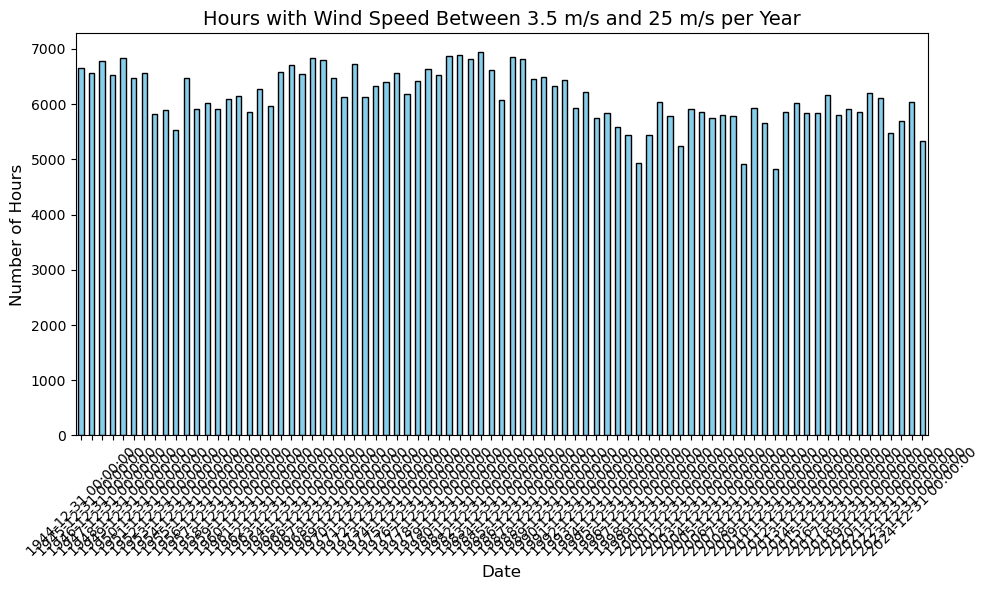

In [26]:
# Plot the data
plt.figure(figsize=(10, 6))  # Optional: specify the figure size
hours_per_year.plot(kind='bar', color='skyblue', edgecolor='black')  # Bar chart for daily hours

# Set the title and labels
plt.title('Hours with Wind Speed Between 3.5 m/s and 25 m/s per Year', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Hours', fontsize=12)

# Show the plot
plt.xticks(rotation=45)  # Optional: rotate x-axis labels for better readability
plt.tight_layout()  # Optional: adjust layout to make it look better
plt.show()


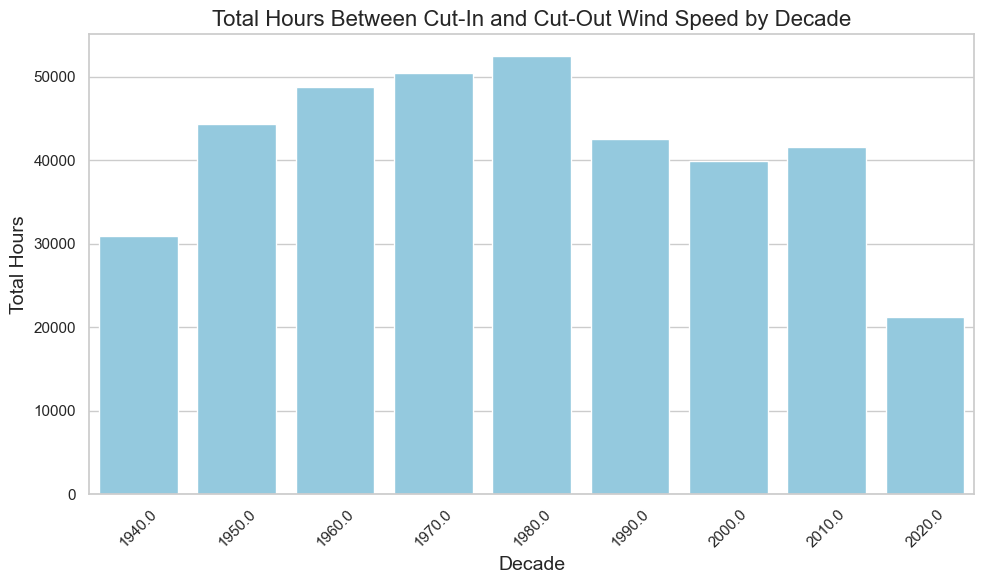

In [ ]:
# Plot the data by decade using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=hours_per_decade.index, y=hours_per_decade.values, color='skyblue')

# Customize the plot with title and labels
plt.title('Total Hours Between Cut-In and Cut-Out Wind Speed by Decade', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Total Hours', fontsize=14)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()